Compararemos el rendimiento de los tres algoritmos en baja dimensión

Llamamos las librerías necesarias para el experimento

In [14]:
from numpy import zeros, array, mean, max, min
from SetsManager import get_l1_ball, generate_data
from Loss import LossFunction
from PrivateFrankWolfe import PolySFW
from PrivateVarianceReduced import PVarReducedFW
from PrivateGD import NoisyGD
from numpy.random import rand
from matplotlib.pyplot import plot, show, fill_between, xlabel, ylabel, legend

Seteamos los parámetros comunes para el experimento

In [2]:
radio = 1
radio_data = 20
epsilon = 2
delta = 0.01
tamano_data = 1000
tamano_test = 1000
f = LossFunction()
f.L0 = 8*radio
f.L1 = 2
erroresFrankWolfe = dict()
erroresVarianceReduced = dict()
erroresGD = dict()
for dim in range(5, 21):
    erroresFrankWolfe[dim] = []
    erroresVarianceReduced[dim] = []
    erroresGD[dim] = []

Hacemos las iteraciones de los experimentos

In [ ]:
for dim in range(5, 21):
    while len(erroresFrankWolfe[dim]) < 10:
        print(dim, len(erroresFrankWolfe[dim]))
        x_star = 1/dim*(2*radio*rand(dim) - radio)
        Y, Z = generate_data(x_star, tamano_data, radio_data, 0.1)
        vertices = get_l1_ball(dim, radio)
        model1 = PolySFW(Z, Y, epsilon, delta, vertices, f, 2*radio, zeros(dim))
        model1.run()
        model2 = PVarReducedFW(Z, Y, epsilon, vertices, f, 2*radio, zeros(dim), 10)
        model2.run()
        model3 = NoisyGD(Z, Y, f, radio, epsilon, delta)
        model3.run()
        Y_test, Z_test = generate_data(x_star, tamano_test, radio_data, 0.05)
        erroresFrankWolfe[dim].append(f.set_f(model1.x_priv, Y_test, Z_test))
        erroresVarianceReduced[dim].append(f.set_f(model2.x_final, Y_test, Z_test))
        erroresGD[dim].append(f.set_f(model3.x_final, Y_test, Z_test))

Obtenemos el grafico de la comparación

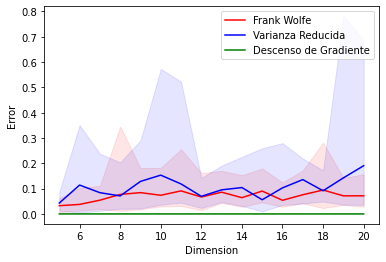

In [20]:
FWmean = array([mean(erroresFrankWolfe[dim]) for dim in range(5, 21)])
FWmax = array([max(erroresFrankWolfe[dim]) for dim in range(5, 21)])
FWmin = array([min(erroresFrankWolfe[dim]) for dim in range(5, 21)])

VRmean = array([mean(erroresVarianceReduced[dim]) for dim in range(5, 21)])
VRmax = array([max(erroresVarianceReduced[dim]) for dim in range(5, 21)])
VRmin = array([min(erroresVarianceReduced[dim]) for dim in range(5, 21)])

GDmean = array([mean(erroresGD[dim]) for dim in range(5, 21)])
GDmax = array([max(erroresGD[dim]) for dim in range(5, 21)])
GDmin = array([min(erroresGD[dim]) for dim in range(5, 21)])


plot(range(5, 21), FWmean, color = 'r', label = 'Frank Wolfe')
fill_between(range(5, 21), FWmin, FWmax, color = 'red', alpha = 0.1)
plot(range(5, 21), VRmean, color = 'b', label = 'Varianza Reducida')
fill_between(range(5, 21), VRmin, VRmax, color = 'blue', alpha = 0.1)
plot(range(5, 21), GDmean, color = 'g', label = 'Descenso de Gradiente')
fill_between(range(5, 21), GDmin, GDmax, color = 'green', alpha = 0.1)
ylabel('Error')
xlabel('Dimension')
legend()
show()